In [15]:

import torch
import matplotlib.pyplot as plt

def loss(y,o):
    return torch.log(1 + torch.exp(torch.mul(-y,o)))

l = torch.log(1 + torch.exp(torch.mul(-y,o)))
y = torch.tensor([-1,1])
o = torch.tensor([-5.0,5.0])
o.requires_grad_(True)
l.backward()
plt.scatter(o,o.grad)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

test loss:  tensor(8293.3994, grad_fn=<MeanBackward0>)
y_hat_test:  tensor([186.1711, 192.5994, 205.2343, 241.3522, 257.4177],
       grad_fn=<SqueezeBackward4>)
w:  tensor([[26.4608]], requires_grad=True)


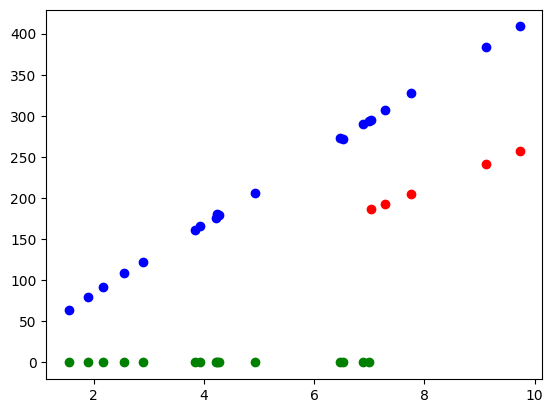

In [43]:
#Q3
import matplotlib.pyplot
import torch

current = torch.tensor([1.5420291, 1.8935232, 2.1603365, 2.5381863, 2.893443, \
                    3.838855, 3.925425, 4.2233696, 4.235571, 4.273397, \
                    4.9332876, 6.4704757, 6.517571, 6.87826, 7.0009003, \
                    7.035741, 7.278681, 7.7561755, 9.121138, 9.728281])
voltage = torch.tensor([63.802246, 80.036026, 91.4903, 108.28776, 122.781975, \
                    161.36314, 166.50816, 176.16772, 180.29395, 179.09758, \
                    206.21027, 272.71857, 272.24033, 289.54745, 293.8488, \
                    295.2281, 306.62274, 327.93243, 383.16296, 408.65967])

lr = 0.03
w1 = torch.normal(0, 0.01, (3,1), requires_grad=True) # 3 params: c,r,q
w2 = torch.normal(0, 0.01, (2,1), requires_grad=True) # 2 params: c,r
w3 = torch.normal(0, 0.01, (1,1), requires_grad=True) # 1 params: r

x_train = current[0:15].reshape(1,15)
x_test = current[15:].reshape(1,5)
y_train = voltage[0:15].reshape(1,15)
y_test = voltage[15:].reshape(1,5)


def forward1(w, x):
    return w[0] + torch.matmul(w[1], x) + torch.matmul(w[2], x ** 2)

def forward2(w, x):
    return w[0] + torch.matmul(w[1], x)

def forward3(w, x):
    return torch.matmul(w[0], x)

def loss(y, y_hat):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

w = w3
y_hat_train = forward3(w, x_train)
l_train = loss(y_train, y_hat_train)

with torch.no_grad():
    l_train.backward()
    w -= lr * w.grad

y_hat_test = forward3(w, x_test)
l_test = loss(y_test, y_hat_test)
print('test loss: ',l_test)
print('y_hat_test: ', y_hat_test)
print('w: ', w)

plt.scatter(current, voltage, color='b')
plt.scatter(x_train, y_hat_train.detach().numpy(), color='g')
plt.scatter(x_test, y_hat_test.detach().numpy(),color='r')
plt.show()


""" CONCLUSIONS
1. learning rate (lr) has big affect in this case since only 1 batch is used
2. I believe using multiple batches would lead to estimating coefficients (almost)
perfectly. Currently only 1 batch used which not enough.

"""
